# Estructura empresarial Medellín según comunas y actividad económica

## Carga de datos

In [40]:
import pandas as pd

file_path = "data.csv"

df = pd.read_csv(file_path)

result = {
    "shape": df.shape,
    "dtypes": df.dtypes.astype(str).to_dict(),
    "head": df.head().to_dict(),
    "nulls": df.isna().sum().to_dict(),
    "description": df.describe(include="all").to_dict(),
}

result

{'shape': (2349, 25),
 'dtypes': {'AÑO': 'int64',
  'CIIU': 'object',
  'Descripción': 'object',
  'ALTAVISTA': 'int64',
  'ARANJUEZ': 'int64',
  'BELEN': 'int64',
  'BUENOS AIRES': 'int64',
  'CASTILLA': 'int64',
  'DOCE DE OCTUBRE': 'int64',
  'EL POBLADO': 'object',
  'GUAYABAL': 'int64',
  'LA AMERICA': 'int64',
  'LA CANDELARIA': 'object',
  'LAURELES-ESTADIO': 'int64',
  'MANRIQUE': 'int64',
  'PALMITAS': 'int64',
  'POPULAR': 'int64',
  'ROBLEDO': 'int64',
  'SAN ANTONIO DE PRADO': 'int64',
  'SAN CRISTOBAL': 'int64',
  'SAN JAVIER': 'int64',
  'SANTA CRUZ': 'int64',
  'SANTA ELENA': 'int64',
  'VILLA HERMOSA': 'int64',
  'Sin georreferenciar': 'object'},
 'head': {'AÑO': {0: 2018, 1: 2018, 2: 2018, 3: 2018, 4: 2018},
  'CIIU': {0: '0', 1: '111', 2: '112', 3: '113', 4: '115'},
  'Descripción': {0: 'Sin CIIU',
   1: 'Cultivo de cereales (excepto arroz), legumbres y semillas oleaginosas',
   2: 'Cultivo de arroz',
   3: 'Cultivo de hortalizas, raíces y tubérculos',
   4: 'Cultivo 

## Normalización

In [41]:
# Normalizar nombres de columnas:
# - quitar espacios
# - reemplazar espacios y guiones por _
# - quitar tildes
df.columns = df.columns.str.strip().str.replace("-", " ").str.lower()

# Nombrar la columna ciiu en mayúsculas
df = df.rename(columns={"ciiu": "CIIU"})

df.columns

Index(['año', 'CIIU', 'descripción', 'altavista', 'aranjuez', 'belen',
       'buenos aires', 'castilla', 'doce de octubre', 'el poblado', 'guayabal',
       'la america', 'la candelaria', 'laureles estadio', 'manrique',
       'palmitas', 'popular', 'robledo', 'san antonio de prado',
       'san cristobal', 'san javier', 'santa cruz', 'santa elena',
       'villa hermosa', 'sin georreferenciar'],
      dtype='object')

In [42]:
# Columnas base obligatorias
BASE = ["año", "CIIU", "descripción"]

In [43]:
# 3. Identificar columnas de comunas
commune_columns = [c for c in df.columns if c not in BASE]
commune_columns

['altavista',
 'aranjuez',
 'belen',
 'buenos aires',
 'castilla',
 'doce de octubre',
 'el poblado',
 'guayabal',
 'la america',
 'la candelaria',
 'laureles estadio',
 'manrique',
 'palmitas',
 'popular',
 'robledo',
 'san antonio de prado',
 'san cristobal',
 'san javier',
 'santa cruz',
 'santa elena',
 'villa hermosa',
 'sin georreferenciar']

In [44]:
df.dtypes

año                      int64
CIIU                    object
descripción             object
altavista                int64
aranjuez                 int64
belen                    int64
buenos aires             int64
castilla                 int64
doce de octubre          int64
el poblado              object
guayabal                 int64
la america               int64
la candelaria           object
laureles estadio         int64
manrique                 int64
palmitas                 int64
popular                  int64
robledo                  int64
san antonio de prado     int64
san cristobal            int64
san javier               int64
santa cruz               int64
santa elena              int64
villa hermosa            int64
sin georreferenciar     object
dtype: object

In [45]:
# 4. Tipado correcto

# Convertir comunas a numérico → int64 (nulos a 0)
for col in commune_columns:
    df[col] = pd.to_numeric(df[col], errors="coerce").fillna(0).astype("int64")

# Convertir CIIU a string de 4 dígitos
df["CIIU"] = df["CIIU"].astype("string").str.zfill(4)
# Remover la coma de miles si existe
df["CIIU"] = df["CIIU"].str.replace(",", "")

# Convertir descripción a string
df["descripción"] = df["descripción"].astype("string")

# Convertir año a string debido a que el año es categórico
df["año"] = df["año"].astype("string")

# Renombrar las columnas de las comunas con el método str.title()
df = df.rename(columns={col: col.title() for col in commune_columns})
commune_columns = [c for c in df.columns if c not in BASE]

df

,año,CIIU,descripción,Altavista,Aranjuez,Belen,Buenos Aires,Castilla,Doce De Octubre,El Poblado,...,Palmitas,Popular,Robledo,San Antonio De Prado,San Cristobal,San Javier,Santa Cruz,Santa Elena,Villa Hermosa,Sin Georreferenciar
0,2018,0000,Sin CIIU,0,2,4,1,0,0,19,...,0,0,2,0,0,1,1,0,2,0
1,2018,0111,"Cultivo de cereales (excepto arroz), legumbres...",0,0,1,0,0,0,3,...,0,0,1,0,0,1,0,0,0,3
2,2018,0112,Cultivo de arroz,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2018,0113,"Cultivo de hortalizas, raíces y tubérculos",0,1,9,0,0,0,9,...,0,0,0,0,0,0,0,0,0,14
4,2018,0115,Cultivo de plantas textiles,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2344,2022,9603,Pompas fúnebres y actividades relacionadas,0,7,1,1,0,2,0,...,0,1,2,5,1,0,1,1,2,2
2345,2022,9609,Otras actividades de servicios personales n.c.p.,5,46,92,26,18,12,75,...,0,9,23,12,8,22,9,9,18,6
2346,2022,9700,Actividades de los hogares individuales como e...,0,0,1,0,0,1,1,...,0,0,1,0,1,0,0,0,0,0
2347,2022,9810,Actividades no diferenciadas de los hogares in...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
df.dtypes

año                     string[python]
CIIU                    string[python]
descripción             string[python]
Altavista                        int64
Aranjuez                         int64
Belen                            int64
Buenos Aires                     int64
Castilla                         int64
Doce De Octubre                  int64
El Poblado                       int64
Guayabal                         int64
La America                       int64
La Candelaria                    int64
Laureles Estadio                 int64
Manrique                         int64
Palmitas                         int64
Popular                          int64
Robledo                          int64
San Antonio De Prado             int64
San Cristobal                    int64
San Javier                       int64
Santa Cruz                       int64
Santa Elena                      int64
Villa Hermosa                    int64
Sin Georreferenciar              int64
dtype: object

## Transformación wide -> long (melt)

In [47]:
# Wide -> Long
df_long = df.melt(
    id_vars=BASE,  # Columnas que no se tocan
    value_vars=commune_columns,  # Columnas que se "despivotean"
    var_name="comuna",  # Nombre para la nueva columna de variable
    value_name="empresas",  # Nombre para la nueva columna de valor
)

# Comuna como string
df_long["comuna"] = df_long["comuna"].astype("string")

# Tipos en el long
df_long["empresas"] = (
    pd.to_numeric(df_long["empresas"], errors="coerce").fillna(0).astype("int64")
)

# CIIU como string para derivar Sección/División/Grupo/Clase
df_long["sección"] = df_long["CIIU"].str[0]  # 1er dígito
df_long["división"] = df_long["CIIU"].str[:2]  # 2 dígitos
df_long["grupo"] = df_long["CIIU"].str[:3]  # 3 dígitos
df_long["clase"] = df_long["CIIU"]  # 4 dígitos

df_long

,año,CIIU,descripción,comuna,empresas,sección,división,grupo,clase
0,2018,0000,Sin CIIU,Altavista,0,0,00,000,0000
1,2018,0111,"Cultivo de cereales (excepto arroz), legumbres...",Altavista,0,0,01,011,0111
2,2018,0112,Cultivo de arroz,Altavista,0,0,01,011,0112
3,2018,0113,"Cultivo de hortalizas, raíces y tubérculos",Altavista,0,0,01,011,0113
4,2018,0115,Cultivo de plantas textiles,Altavista,0,0,01,011,0115
...,...,...,...,...,...,...,...,...,...
51673,2022,9603,Pompas fúnebres y actividades relacionadas,Sin Georreferenciar,2,9,96,960,9603
51674,2022,9609,Otras actividades de servicios personales n.c.p.,Sin Georreferenciar,6,9,96,960,9609
51675,2022,9700,Actividades de los hogares individuales como e...,Sin Georreferenciar,0,9,97,970,9700
51676,2022,9810,Actividades no diferenciadas de los hogares in...,Sin Georreferenciar,0,9,98,981,9810


In [48]:
df_long.dtypes

año            string[python]
CIIU           string[python]
descripción    string[python]
comuna         string[python]
empresas                int64
sección        string[python]
división       string[python]
grupo          string[python]
clase          string[python]
dtype: object

## Tratamiento de los Códigos CIIU

### Carga de los datos

In [49]:
import pandas as pd

path = "EstructuraDetalladaCIIU_4AC.xlsx"
df = pd.read_excel(path)

df

,ESTRUCTURA DETALLADA DE LA CLASIFICACIÓN INDUSTRIAL INTERNACIONAL\nUNIFORME ADAPTADA PARA COLOMBIA - CIIU REV. 4 A.C.,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,NaN,NaN,NaN,NaN
1,División,Grupo,Clase,Descripción
2,SECCIÓN A,NaN,NaN,"AGRICULTURA, GANADERÍA, CAZA, SILVICULTURA Y P..."
3,01,NaN,NaN,"Agricultura, ganadería, caza y actividades de ..."
4,NaN,011,NaN,Cultivos agrícolas transitorios
...,...,...,...,...
708,NaN,981,9810,Actividades no diferenciadas de los hogares in...
709,NaN,982,9820,Actividades no diferenciadas de los hogares in...
710,SECCIÓN U,NaN,NaN,ACTIVIDADES DE ORGANIZACIONES Y ENTIDADES EXTR...
711,99,NaN,NaN,Actividades de organizaciones y entidades extr...


### Limpieza

In [50]:
df.columns = ["estructura", "grupo", "clase", "descripción"]
df

,estructura,grupo,clase,descripción
0,NaN,NaN,NaN,NaN
1,División,Grupo,Clase,Descripción
2,SECCIÓN A,NaN,NaN,"AGRICULTURA, GANADERÍA, CAZA, SILVICULTURA Y P..."
3,01,NaN,NaN,"Agricultura, ganadería, caza y actividades de ..."
4,NaN,011,NaN,Cultivos agrícolas transitorios
...,...,...,...,...
708,NaN,981,9810,Actividades no diferenciadas de los hogares in...
709,NaN,982,9820,Actividades no diferenciadas de los hogares in...
710,SECCIÓN U,NaN,NaN,ACTIVIDADES DE ORGANIZACIONES Y ENTIDADES EXTR...
711,99,NaN,NaN,Actividades de organizaciones y entidades extr...


In [51]:
for col in df.columns:
    df[col] = df[col].astype("string")

df.dtypes

estructura     string[python]
grupo          string[python]
clase          string[python]
descripción    string[python]
dtype: object

In [52]:
# Añadir descripción de sección
df["descripción sección"] = (
    df["descripción"]
    .where(df["estructura"].str.contains("SECCIÓN"))
    .ffill()
    .astype("string")
)
# Añadir descripción de división
df["descripción división"] = (
    df["descripción"]
    .where(df["estructura"].str.match(r"^\d{2}$"))
    .ffill()
    .astype("string")
)
# Añadir descripción de grupo
df["descripción grupo"] = (
    df["descripción"].where(df["grupo"].str.match(r"^\d{3}$")).ffill().astype("string")
)
# Renombrar columna descripción a descripción_clase
df = df.rename(columns={"descripción": "descripción clase"})
df

,estructura,grupo,clase,descripción clase,descripción sección,descripción división,descripción grupo
0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
1,División,Grupo,Clase,Descripción,<NA>,<NA>,<NA>
2,SECCIÓN A,<NA>,<NA>,"AGRICULTURA, GANADERÍA, CAZA, SILVICULTURA Y P...","AGRICULTURA, GANADERÍA, CAZA, SILVICULTURA Y P...",<NA>,<NA>
3,01,<NA>,<NA>,"Agricultura, ganadería, caza y actividades de ...","AGRICULTURA, GANADERÍA, CAZA, SILVICULTURA Y P...","Agricultura, ganadería, caza y actividades de ...",<NA>
4,<NA>,011,<NA>,Cultivos agrícolas transitorios,"AGRICULTURA, GANADERÍA, CAZA, SILVICULTURA Y P...","Agricultura, ganadería, caza y actividades de ...",Cultivos agrícolas transitorios
...,...,...,...,...,...,...,...
708,<NA>,981,9810,Actividades no diferenciadas de los hogares in...,ACTIVIDADES DE LOS HOGARES INDIVIDUALES EN CAL...,Actividades no diferenciadas de los hogares in...,Actividades no diferenciadas de los hogares in...
709,<NA>,982,9820,Actividades no diferenciadas de los hogares in...,ACTIVIDADES DE LOS HOGARES INDIVIDUALES EN CAL...,Actividades no diferenciadas de los hogares in...,Actividades no diferenciadas de los hogares in...
710,SECCIÓN U,<NA>,<NA>,ACTIVIDADES DE ORGANIZACIONES Y ENTIDADES EXTR...,ACTIVIDADES DE ORGANIZACIONES Y ENTIDADES EXTR...,Actividades no diferenciadas de los hogares in...,Actividades no diferenciadas de los hogares in...
711,99,<NA>,<NA>,Actividades de organizaciones y entidades extr...,ACTIVIDADES DE ORGANIZACIONES Y ENTIDADES EXTR...,Actividades de organizaciones y entidades extr...,Actividades no diferenciadas de los hogares in...


In [53]:
# Derivar Sección, División, Grupo y Clase
df["sección"] = (
    df["estructura"]
    .where(df["estructura"].str.lower().str.startswith("sección"))
    .str.split()
    .str[1]
    .ffill()
    .astype("string")
)
df["división"] = (
    df["estructura"]
    .where(df["estructura"].str.match(r"^\d{2}$"))
    .ffill()
    .astype("string")
)
df["grupo"] = (
    df["grupo"].where(df["grupo"].str.match(r"^\d{3}$")).ffill().astype("string")
)
df["clase"] = df["clase"].where(df["clase"].str.match(r"^\d{4}$")).astype("string")

df

,estructura,grupo,clase,descripción clase,descripción sección,descripción división,descripción grupo,sección,división
0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
1,División,<NA>,<NA>,Descripción,<NA>,<NA>,<NA>,<NA>,<NA>
2,SECCIÓN A,<NA>,<NA>,"AGRICULTURA, GANADERÍA, CAZA, SILVICULTURA Y P...","AGRICULTURA, GANADERÍA, CAZA, SILVICULTURA Y P...",<NA>,<NA>,A,<NA>
3,01,<NA>,<NA>,"Agricultura, ganadería, caza y actividades de ...","AGRICULTURA, GANADERÍA, CAZA, SILVICULTURA Y P...","Agricultura, ganadería, caza y actividades de ...",<NA>,A,01
4,<NA>,011,<NA>,Cultivos agrícolas transitorios,"AGRICULTURA, GANADERÍA, CAZA, SILVICULTURA Y P...","Agricultura, ganadería, caza y actividades de ...",Cultivos agrícolas transitorios,A,01
...,...,...,...,...,...,...,...,...,...
708,<NA>,981,9810,Actividades no diferenciadas de los hogares in...,ACTIVIDADES DE LOS HOGARES INDIVIDUALES EN CAL...,Actividades no diferenciadas de los hogares in...,Actividades no diferenciadas de los hogares in...,T,98
709,<NA>,982,9820,Actividades no diferenciadas de los hogares in...,ACTIVIDADES DE LOS HOGARES INDIVIDUALES EN CAL...,Actividades no diferenciadas de los hogares in...,Actividades no diferenciadas de los hogares in...,T,98
710,SECCIÓN U,982,<NA>,ACTIVIDADES DE ORGANIZACIONES Y ENTIDADES EXTR...,ACTIVIDADES DE ORGANIZACIONES Y ENTIDADES EXTR...,Actividades no diferenciadas de los hogares in...,Actividades no diferenciadas de los hogares in...,U,98
711,99,982,<NA>,Actividades de organizaciones y entidades extr...,ACTIVIDADES DE ORGANIZACIONES Y ENTIDADES EXTR...,Actividades de organizaciones y entidades extr...,Actividades no diferenciadas de los hogares in...,U,99


In [54]:
# Filtrar solo las filas de clase
df_clase = df[df["clase"].notna()].copy()
# Remover columna estructura
df_clase = df_clase.drop(columns=["estructura"])
# Ordenar columnas: sección, descripción_sección, división, descripción_división, grupo, descripción_grupo, clase, descripción_clase
df_clase = df_clase[["sección", "descripción sección", "división", "descripción división", "grupo", "descripción grupo", "clase", "descripción clase"]]
df_clase

,sección,descripción sección,división,descripción división,grupo,descripción grupo,clase,descripción clase
5,A,"AGRICULTURA, GANADERÍA, CAZA, SILVICULTURA Y P...",01,"Agricultura, ganadería, caza y actividades de ...",011,Cultivos agrícolas transitorios,0111,"Cultivo de cereales (excepto arroz), legumbres..."
6,A,"AGRICULTURA, GANADERÍA, CAZA, SILVICULTURA Y P...",01,"Agricultura, ganadería, caza y actividades de ...",011,Cultivos agrícolas transitorios,0112,Cultivo de arroz
7,A,"AGRICULTURA, GANADERÍA, CAZA, SILVICULTURA Y P...",01,"Agricultura, ganadería, caza y actividades de ...",011,Cultivos agrícolas transitorios,0113,"Cultivo de hortalizas, raíces y tubérculos"
8,A,"AGRICULTURA, GANADERÍA, CAZA, SILVICULTURA Y P...",01,"Agricultura, ganadería, caza y actividades de ...",011,Cultivos agrícolas transitorios,0114,Cultivo de tabaco
9,A,"AGRICULTURA, GANADERÍA, CAZA, SILVICULTURA Y P...",01,"Agricultura, ganadería, caza y actividades de ...",011,Cultivos agrícolas transitorios,0115,Cultivo de plantas textiles
...,...,...,...,...,...,...,...,...
703,S,OTRAS ACTIVIDADES DE SERVICIOS,96,Otras actividades de servicios personales,960,Otras actividades de servicios personales,9609,Otras actividades de servicios personales n.c.p.
706,T,ACTIVIDADES DE LOS HOGARES INDIVIDUALES EN CAL...,97,Actividades de los hogares individuales como e...,970,Actividades de los hogares individuales como e...,9700,Actividades de los hogares individuales como e...
708,T,ACTIVIDADES DE LOS HOGARES INDIVIDUALES EN CAL...,98,Actividades no diferenciadas de los hogares in...,981,Actividades no diferenciadas de los hogares in...,9810,Actividades no diferenciadas de los hogares in...
709,T,ACTIVIDADES DE LOS HOGARES INDIVIDUALES EN CAL...,98,Actividades no diferenciadas de los hogares in...,982,Actividades no diferenciadas de los hogares in...,9820,Actividades no diferenciadas de los hogares in...


### Unión de los CIIU al dataset principal

In [55]:
# Cruzar df_long con df_clase para añadir descripciones
df_join = df_long.merge(
    df_clase,
    how="left",
    left_on="clase",
    right_on="clase",
    suffixes=("", "_y"),
)

df_join

,año,CIIU,descripción,comuna,empresas,sección,división,grupo,clase,sección_y,descripción sección,división_y,descripción división,grupo_y,descripción grupo,descripción clase
0,2018,0000,Sin CIIU,Altavista,0,0,00,000,0000,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
1,2018,0111,"Cultivo de cereales (excepto arroz), legumbres...",Altavista,0,0,01,011,0111,A,"AGRICULTURA, GANADERÍA, CAZA, SILVICULTURA Y P...",01,"Agricultura, ganadería, caza y actividades de ...",011,Cultivos agrícolas transitorios,"Cultivo de cereales (excepto arroz), legumbres..."
2,2018,0112,Cultivo de arroz,Altavista,0,0,01,011,0112,A,"AGRICULTURA, GANADERÍA, CAZA, SILVICULTURA Y P...",01,"Agricultura, ganadería, caza y actividades de ...",011,Cultivos agrícolas transitorios,Cultivo de arroz
3,2018,0113,"Cultivo de hortalizas, raíces y tubérculos",Altavista,0,0,01,011,0113,A,"AGRICULTURA, GANADERÍA, CAZA, SILVICULTURA Y P...",01,"Agricultura, ganadería, caza y actividades de ...",011,Cultivos agrícolas transitorios,"Cultivo de hortalizas, raíces y tubérculos"
4,2018,0115,Cultivo de plantas textiles,Altavista,0,0,01,011,0115,A,"AGRICULTURA, GANADERÍA, CAZA, SILVICULTURA Y P...",01,"Agricultura, ganadería, caza y actividades de ...",011,Cultivos agrícolas transitorios,Cultivo de plantas textiles
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51673,2022,9603,Pompas fúnebres y actividades relacionadas,Sin Georreferenciar,2,9,96,960,9603,S,OTRAS ACTIVIDADES DE SERVICIOS,96,Otras actividades de servicios personales,960,Otras actividades de servicios personales,Pompas fúnebres y actividades relacionadas
51674,2022,9609,Otras actividades de servicios personales n.c.p.,Sin Georreferenciar,6,9,96,960,9609,S,OTRAS ACTIVIDADES DE SERVICIOS,96,Otras actividades de servicios personales,960,Otras actividades de servicios personales,Otras actividades de servicios personales n.c.p.
51675,2022,9700,Actividades de los hogares individuales como e...,Sin Georreferenciar,0,9,97,970,9700,T,ACTIVIDADES DE LOS HOGARES INDIVIDUALES EN CAL...,97,Actividades de los hogares individuales como e...,970,Actividades de los hogares individuales como e...,Actividades de los hogares individuales como e...
51676,2022,9810,Actividades no diferenciadas de los hogares in...,Sin Georreferenciar,0,9,98,981,9810,T,ACTIVIDADES DE LOS HOGARES INDIVIDUALES EN CAL...,98,Actividades no diferenciadas de los hogares in...,981,Actividades no diferenciadas de los hogares in...,Actividades no diferenciadas de los hogares in...


In [56]:
df_join.dtypes

año                     string[python]
CIIU                    string[python]
descripción             string[python]
comuna                  string[python]
empresas                         int64
sección                 string[python]
división                string[python]
grupo                   string[python]
clase                   string[python]
sección_y               string[python]
descripción sección     string[python]
división_y              string[python]
descripción división    string[python]
grupo_y                 string[python]
descripción grupo       string[python]
descripción clase       string[python]
dtype: object

In [57]:
# Dejar solo las columnas necesarias
df_join = df_join[
    [
        "año",
        "comuna",
        "CIIU",
        "sección_y",
        "descripción sección",
        "división_y",
        "descripción división",
        "grupo_y",
        "descripción grupo",
        "clase",
        "descripción clase",
        "empresas",
    ]
]

df_join.rename(
    columns={
        "sección_y": "sección",
        "división_y": "división",
        "grupo_y": "grupo",
    },
    inplace=True,
)

df_join

C:\Users\samaf\AppData\Local\Temp\ipykernel_6424\803650581.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_join.rename(


,año,comuna,CIIU,sección,descripción sección,división,descripción división,grupo,descripción grupo,clase,descripción clase,empresas
0,2018,Altavista,0000,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,0000,<NA>,0
1,2018,Altavista,0111,A,"AGRICULTURA, GANADERÍA, CAZA, SILVICULTURA Y P...",01,"Agricultura, ganadería, caza y actividades de ...",011,Cultivos agrícolas transitorios,0111,"Cultivo de cereales (excepto arroz), legumbres...",0
2,2018,Altavista,0112,A,"AGRICULTURA, GANADERÍA, CAZA, SILVICULTURA Y P...",01,"Agricultura, ganadería, caza y actividades de ...",011,Cultivos agrícolas transitorios,0112,Cultivo de arroz,0
3,2018,Altavista,0113,A,"AGRICULTURA, GANADERÍA, CAZA, SILVICULTURA Y P...",01,"Agricultura, ganadería, caza y actividades de ...",011,Cultivos agrícolas transitorios,0113,"Cultivo de hortalizas, raíces y tubérculos",0
4,2018,Altavista,0115,A,"AGRICULTURA, GANADERÍA, CAZA, SILVICULTURA Y P...",01,"Agricultura, ganadería, caza y actividades de ...",011,Cultivos agrícolas transitorios,0115,Cultivo de plantas textiles,0
...,...,...,...,...,...,...,...,...,...,...,...,...
51673,2022,Sin Georreferenciar,9603,S,OTRAS ACTIVIDADES DE SERVICIOS,96,Otras actividades de servicios personales,960,Otras actividades de servicios personales,9603,Pompas fúnebres y actividades relacionadas,2
51674,2022,Sin Georreferenciar,9609,S,OTRAS ACTIVIDADES DE SERVICIOS,96,Otras actividades de servicios personales,960,Otras actividades de servicios personales,9609,Otras actividades de servicios personales n.c.p.,6
51675,2022,Sin Georreferenciar,9700,T,ACTIVIDADES DE LOS HOGARES INDIVIDUALES EN CAL...,97,Actividades de los hogares individuales como e...,970,Actividades de los hogares individuales como e...,9700,Actividades de los hogares individuales como e...,0
51676,2022,Sin Georreferenciar,9810,T,ACTIVIDADES DE LOS HOGARES INDIVIDUALES EN CAL...,98,Actividades no diferenciadas de los hogares in...,981,Actividades no diferenciadas de los hogares in...,9810,Actividades no diferenciadas de los hogares in...,0


In [58]:
df_long.shape, df_join.shape

((51678, 9), (51678, 12))

In [59]:
# Definir descripción del CIIU 0000
df_join.loc[df_join["CIIU"] == "0000", "descripción clase"] = "Sin información"
# Definir descripción del CIIU no oficial 0090 con el valor original más un no oficial.
df_join.loc[df_join["CIIU"] == "0090", "descripción clase"] = df_long.loc[df_join["CIIU"] == "0090", "descripción"] + " (No oficial)"

df_join

,año,comuna,CIIU,sección,descripción sección,división,descripción división,grupo,descripción grupo,clase,descripción clase,empresas
0,2018,Altavista,0000,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,0000,Sin información,0
1,2018,Altavista,0111,A,"AGRICULTURA, GANADERÍA, CAZA, SILVICULTURA Y P...",01,"Agricultura, ganadería, caza y actividades de ...",011,Cultivos agrícolas transitorios,0111,"Cultivo de cereales (excepto arroz), legumbres...",0
2,2018,Altavista,0112,A,"AGRICULTURA, GANADERÍA, CAZA, SILVICULTURA Y P...",01,"Agricultura, ganadería, caza y actividades de ...",011,Cultivos agrícolas transitorios,0112,Cultivo de arroz,0
3,2018,Altavista,0113,A,"AGRICULTURA, GANADERÍA, CAZA, SILVICULTURA Y P...",01,"Agricultura, ganadería, caza y actividades de ...",011,Cultivos agrícolas transitorios,0113,"Cultivo de hortalizas, raíces y tubérculos",0
4,2018,Altavista,0115,A,"AGRICULTURA, GANADERÍA, CAZA, SILVICULTURA Y P...",01,"Agricultura, ganadería, caza y actividades de ...",011,Cultivos agrícolas transitorios,0115,Cultivo de plantas textiles,0
...,...,...,...,...,...,...,...,...,...,...,...,...
51673,2022,Sin Georreferenciar,9603,S,OTRAS ACTIVIDADES DE SERVICIOS,96,Otras actividades de servicios personales,960,Otras actividades de servicios personales,9603,Pompas fúnebres y actividades relacionadas,2
51674,2022,Sin Georreferenciar,9609,S,OTRAS ACTIVIDADES DE SERVICIOS,96,Otras actividades de servicios personales,960,Otras actividades de servicios personales,9609,Otras actividades de servicios personales n.c.p.,6
51675,2022,Sin Georreferenciar,9700,T,ACTIVIDADES DE LOS HOGARES INDIVIDUALES EN CAL...,97,Actividades de los hogares individuales como e...,970,Actividades de los hogares individuales como e...,9700,Actividades de los hogares individuales como e...,0
51676,2022,Sin Georreferenciar,9810,T,ACTIVIDADES DE LOS HOGARES INDIVIDUALES EN CAL...,98,Actividades no diferenciadas de los hogares in...,981,Actividades no diferenciadas de los hogares in...,9810,Actividades no diferenciadas de los hogares in...,0


## Métricas por comuna y por sector

In [60]:
# Total de empresas en toda la ciudad (por año)
businesses_per_year = (
    df_join.groupby("año")["empresas"]
    .sum()
    .reset_index()
    .rename(columns={"empresas": "total_empresas_ciudad"})
)
# Añade una celda que muestre la diferencia anual en el número de empresas comparado con el año anterior
businesses_per_year["diferencia_anual"] = businesses_per_year["total_empresas_ciudad"].diff()

businesses_per_year

,año,total_empresas_ciudad,diferencia_anual
0,2018,95137,NaN
1,2019,98600,3463.0
2,2020,91286,-7314.0
3,2021,96811,5525.0
4,2022,105182,8371.0


In [61]:
# Gráfica las empresas por año (el año debe de ser numérico y exacto) y su diferencia anual
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(businesses_per_year["año"], businesses_per_year["total_empresas_ciudad"], marker='o')
plt.title("Total de empresas en Medellín por año")
plt.xlabel("Año")
plt.ylabel("Total de empresas")
plt.grid(True)
plt.show()

<IPython.core.display.Javascript object>

In [62]:
# ---- Métricas por comuna ----

# Total de empresas por comuna (todas los años)
businesses_by_commune_per_year = (
    df_join.groupby("comuna", as_index=False)["empresas"]
    .sum()
    .reset_index()
    .rename(columns={"empresas": "total_empresas_comuna"})
)
# Falta añadir la cantidad de empresas por año en cada comuna
businesses_by_commune_per_year = businesses_by_commune_per_year.merge(
    df_join.groupby(["comuna", "año"])["empresas"].sum().reset_index(),
    how="left",
    on="comuna",
    suffixes=("", "_por_año"),
)


businesses_by_commune_per_year

,index,comuna,total_empresas_comuna,año,empresas
0,0,Altavista,1666,2018,0
1,0,Altavista,1666,2019,0
2,0,Altavista,1666,2020,0
3,0,Altavista,1666,2021,637
4,0,Altavista,1666,2022,1029
...,...,...,...,...,...
105,21,Villa Hermosa,11616,2018,1727
106,21,Villa Hermosa,11616,2019,1759
107,21,Villa Hermosa,11616,2020,1539
108,21,Villa Hermosa,11616,2021,3539


In [63]:
# Gráfica las empresas por una comuna en especifico (todas los años)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
# Cambia "Comuna 1" por la comuna que desees graficar
commune_to_plot = "Aranjuez"
commune_data = businesses_by_commune_per_year[businesses_by_commune_per_year["comuna"] == commune_to_plot]

plt.plot(commune_data["año"], commune_data["empresas"], marker='o')
plt.title(f"Total de empresas en {commune_to_plot} por año")
plt.xlabel("Año")
plt.ylabel("Número de empresas")
plt.grid(True)
plt.show()

<IPython.core.display.Javascript object>

In [ ]:
# ---- Métricas por sector (Division CIIU) ----
# Total de empresas por división (todas los años)
businesses_by_division_per_year = (
    df_join.groupby("división", as_index=False)["empresas"]
    .sum()
    .reset_index()
    .rename(columns={"empresas": "total_empresas_división"})
)
businesses_by_division_per_year = businesses_by_division_per_year.merge(
    df_join.groupby(["división", "año"])["empresas"].sum().reset_index(),
    how="left",
    on="división",
    suffixes=("", "_por_año"),
)

businesses_by_division_per_year

,index,división,total_empresas_división,año,empresas,porcentaje_del_total
0,0,01,9243,2018,1673,0.343521
1,0,01,9243,2019,1807,0.371035
2,0,01,9243,2020,1741,0.357483
3,0,01,9243,2021,1936,0.397523
4,0,01,9243,2022,2086,0.428323
...,...,...,...,...,...,...
426,85,98,54,2020,12,0.002464
427,85,98,54,2021,14,0.002875
428,85,98,54,2022,15,0.003080
429,86,99,1,2019,1,0.000205


In [72]:
import matplotlib.pyplot as plt

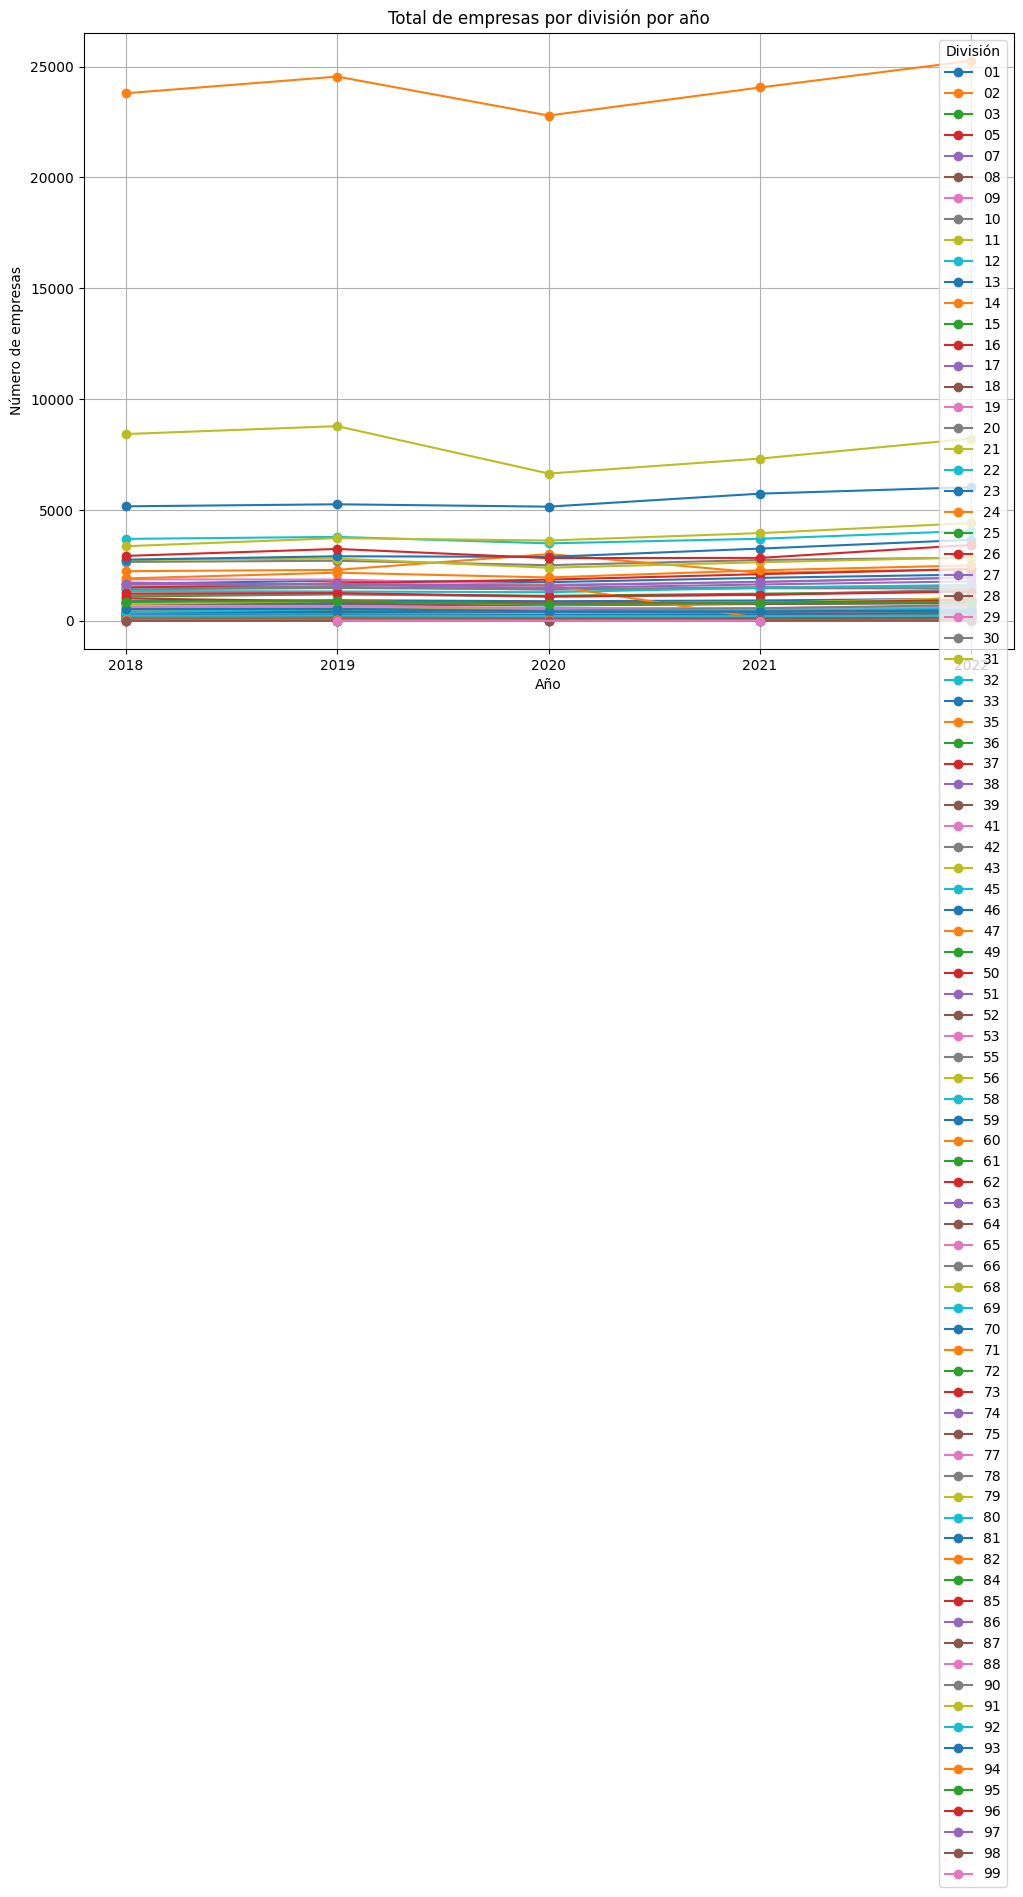

In [73]:
# Gráfica las empresas por división (todos los años), utiliza un color diferente para cada división
plt.figure(figsize=(12, 8))
divisions = businesses_by_division_per_year["división"].unique()
for division in divisions:
    division_data = businesses_by_division_per_year[businesses_by_division_per_year["división"] == division]
    plt.plot(division_data["año"], division_data["empresas"], marker='o', label=division)
plt.title("Total de empresas por división por año")
plt.xlabel("Año")
plt.ylabel("Número de empresas")
plt.legend(title="División")
plt.grid(True)
plt.show()